# Transformers for Computer Vision 

In [ ]:
!pip install transformers==4.24.0 datasets==2.7.1 evaluate==0.3.0 gradio==3.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 8.3 MB/s 
     |████████████████████████████████| 451 kB 60.0 MB/s 
     |████████████████████████████████| 72 kB 1.2 MB/s 
     |████████████████████████████████| 11.6 MB 62.6 MB/s 
     |████████████████████████████████| 7.6 MB 33.9 MB/s 
     |████████████████████████████████| 182 kB 64.2 MB/s 
     |████████████████████████████████| 213 kB 46.0 MB/s 
     |████████████████████████████████| 132 kB 72.2 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 106 kB 51.0 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 278 kB 48.8 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 2.3 MB 49.1 MB/s 
     |████████████████████████████████| 2

# Tokenizers for Text

## Working with the Hugging Face library

**We want to use the same weights for our model and tokenizer. How can we use the bert uncased checkpoint ('bert-base-uncased') for our tokenizer.**

In [ ]:
from transformers import AutoTokenizer
checkpoint = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

**How can we determine how large the vocabulary is?**

In [ ]:
print(tokenizer.vocab)
print(f'The vocabulary size is {len(tokenizer.vocab)}')

{'##amp': 16613, 'irene': 12855, '##at': 4017, 'paradigm': 20680, '##ishment': 21808, 'projection': 13996, 'predators': 12630, 'refurbished': 18662, 'email': 10373, 'digits': 16648, 'deliveries': 23534, 'demon': 5698, 'vampire': 4393, 'conferred': 15186, 'wardrobe': 17828, '##rogated': 26565, '##sit': 28032, 'alert': 9499, '##gga': 23033, '2011': 2249, 'films': 3152, '51': 4868, 'terminating': 23552, 'commenting': 15591, 'guidance': 8606, 'confirming': 19195, 'shrieked': 22383, 'floating': 8274, 'fare': 13258, 'damages': 12394, 'isolation': 12477, 'frustrated': 10206, '##khan': 26370, '[unused141]': 146, 'disregard': 27770, 'wharf': 16435, 'exemption': 19621, 'economics': 5543, 'zheng': 20985, 'blaming': 24114, 'trinity': 7124, 'upheld': 16813, 'rifles': 9494, 'nano': 28991, 'atkins': 21087, '∆': 1594, '十': 1783, '##ance': 6651, 'peabody': 20004, 'fought': 4061, 'idea': 2801, 'leningrad': 15930, 'heroin': 19690, 'fifa': 5713, '##werk': 29548, 'shifts': 12363, 'strips': 12970, 'corbett'

**Convert the following sentence into**
1. Tokens
2. Numerical IDs

In [ ]:
sentence = 'I like NLP'
print(sentence)
tokens = tokenizer.tokenize(sentence)
print(tokens)
ids = tokenizer.encode(sentence)
print(ids)
print(tokenizer.decode(ids))


I like NLP
['i', 'like', 'nl', '##p']
[101, 1045, 2066, 17953, 2361, 102]
[CLS] i like nlp [SEP]


In [ ]:
print(f'{tokenizer.cls_token} -> {tokenizer.cls_token_id}')
print(f'{tokenizer.sep_token} -> {tokenizer.sep_token_id}')

[CLS] -> 101
[SEP] -> 102


In [ ]:
'😀' in tokenizer.vocab

False

In [ ]:
sentence = 'I like NLP😀'
tokenizer.tokenize(sentence)

['i', 'like', '[UNK]']

In [ ]:
first_sentence = 'I like NLP.'
second_sentence = 'What about you?'
input = tokenizer(first_sentence, second_sentence, return_tensors='pt')
input

{'input_ids': tensor([[  101,  1045,  2066, 17953,  2361,  1012,   102,  2054,  2055,  2017,
          1029,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
input['input_ids']

tensor([[  101,  1045,  2066, 17953,  2361,  1012,   102,  2054,  2055,  2017,
          1029,   102]])

In [ ]:
input['token_type_ids']

tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

In [ ]:
input['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
first_sentence = 'I like NLP.'
second_sentence = 'What are your thoughts on the subject?'
input = tokenizer([first_sentence, second_sentence], padding=True, return_tensors='pt')
input['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

# Text classification - IMDB Dataset

## Datasets library

In [ ]:
from datasets import list_datasets
list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookcorpusopen'

In [ ]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [ ]:
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [ ]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

In [ ]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [ ]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [ ]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [ ]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [ ]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [ ]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [ ]:
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [ ]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [ ]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"When I first saw this movie, I thought it was the typical ""love thy neighbour"" stuff....The more the movie was going on, the more I got involved. Acting is magnificent from both actors, direction was great, the story unusual. Cried my eyes off, f...",1
1284,"A friend of mine recommended this movie, citing my vocal and inflective similarities with Des Howl, the movie's main character. I guess to an extent I can see that and perhaps a bit more, I'm not very sure whether or not that's flattering portray...",1
408,"The great cinematic musicals were made between 1950 and 1970. This twenty year spell can be rightly labelled the “Golden Era” of the genre. There were musicals prior to that, and there have been musicals since… but the true classics seem invariab...",1
1282,"The 1963 version of ""The Haunting"" has been one of my favorite horror films for years, so I anticipated the release of this 1999 remake with a good deal of trepidation. It hardly seemed that any follow-up could exceed or even equal the original m...",0
1447,"That's right. A movie written, directed and produced by Fred Tepper and family. (Fred should have known better, having worked the sets of 'Titantic' and 'Dogma'.) <br /><br />So, the plot. There are some scientists, and some forest rangers, and a...",0
1144,"Am not familiar with the trilogy but came upon this film last night on Showtime. The film looked very well done with the set design and the cinematography, but the screenplay was stilted and wooden. The acting was fairly bad- thought the two fema...",0
1381,"Of the three remakes on W. Somerset Maughan's novel, this one is the best one, and not particularly because what John Cromwell brought to the film. The film is worth a look because of the break through performance by Bette Davis, who as Mildred R...",1
181,"I've just purchased the restored version of a film that I remember with much affection from childhood and it's certainly made for a curious afternoon's entertainment. Bedknobs definitely makes more sense in its complete form, the deleted scenes (...",1
1183,"Now look, I won't lie to you, but I only got this movie for $3.99 from a friend because it had Danni Filth, the lead singer of the ever popular death metal band ""Cradle Of Filth"" in it. I expected of course violence and gore at its finest, as tha...",0
1103,"Universal Soldier: The Return is not the worst movie ever made. No, that honor would have to go to a film that attempted to make some sort of statement or accomplish some artistic feat but failed in a pathetic or offensive manner. However, perhap...",0


In [ ]:
df.loc[0, 'text']

'Michael Rooker is a decent actor, but he has no business being the lead except in a low budget movie. He really does not have much charisma. Ryo Ishibashi has a lot more screen presence, and sadly he is not really the main character. Most of the screen time goes to the brick-faced Rooker.<br /><br />Danielle Harris (from the Halloween 4 and 5 movies) plays his daughter, and she is cute and entertaining but she is written as not being too smart and one of her dumb mistakes gets one of the main characters killed. Comedians Fred Willard, Bobcat Goldthwait, and Stephen Furst are here in interesting roles. Just watching what happens to these characters is priceless. <br /><br />Vincent Schiavelli plays the Consigliare to the local Mafia Godfather, and it is hard to tell whether or not he is working the movie as a comedy. Tim Thomerson is also in this movie. He seems to be in every extremely low budget direct-to-video action movie. Thomerson is also in some low-budget comedies. Seeing so ma

In [ ]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

'Michael Rooker is a decent actor, but he has no business being the lead except in a low budget movie. He really does not have much charisma. Ryo Ishibashi has a lot more screen presence, and sadly he is not really the main character. Most of the screen time goes to the brick-faced Rooker.Danielle Harris (from the Halloween 4 and 5 movies) plays his daughter, and she is cute and entertaining but she is written as not being too smart and one of her dumb mistakes gets one of the main characters killed. Comedians Fred Willard, Bobcat Goldthwait, and Stephen Furst are here in interesting roles. Just watching what happens to these characters is priceless. Vincent Schiavelli plays the Consigliare to the local Mafia Godfather, and it is hard to tell whether or not he is working the movie as a comedy. Tim Thomerson is also in this movie. He seems to be in every extremely low budget direct-to-video action movie. Thomerson is also in some low-budget comedies. Seeing so many comedians and comic a

In [ ]:
df.label.value_counts()

1    812
0    788
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


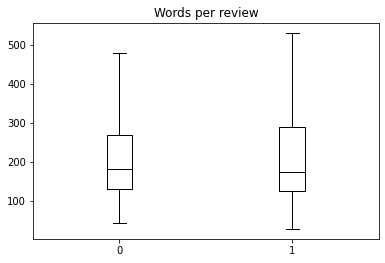

In [ ]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
204,Allison Dean's performance is what stands out in my mind watching this film. She balances out the melancholy tone of the film with an iridescent energy. I would like to see more of her.,1,34
220,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
513,One of my favorite scenes is at the beginning when guests on a private yacht decide to take an impromptu swim - in their underwear! Rather risqué for 1931!,1,29
670,"Brilliant execution in displaying once and for all, this time in the venue of politics, of how ""good intentions do actually pave the road to hell"". Excellent!",1,27
1483,"My favorite part of this film was the old man's attempt to cure his neighbor's ills by putting the strong medicine in his bath. There is more than a sense of family, there is a sense of community.",1,38
1543,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34


In [ ]:
imdb.reset_format()

## Tokenizer

In [ ]:
from transformers import AutoTokenizer

#checkpoint = "distilbert-base-cased"
checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [ ]:
print(imdb_encoded['train'][0])

{'text': 'Michael Rooker is a decent actor, but he has no business being the lead except in a low budget movie. He really does not have much charisma. Ryo Ishibashi has a lot more screen presence, and sadly he is not really the main character. Most of the screen time goes to the brick-faced Rooker.<br /><br />Danielle Harris (from the Halloween 4 and 5 movies) plays his daughter, and she is cute and entertaining but she is written as not being too smart and one of her dumb mistakes gets one of the main characters killed. Comedians Fred Willard, Bobcat Goldthwait, and Stephen Furst are here in interesting roles. Just watching what happens to these characters is priceless. <br /><br />Vincent Schiavelli plays the Consigliare to the local Mafia Godfather, and it is hard to tell whether or not he is working the movie as a comedy. Tim Thomerson is also in this movie. He seems to be in every extremely low budget direct-to-video action movie. Thomerson is also in some low-budget comedies. See

## Tiny IMDB

In [ ]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTokenClassification',
 'AutoModelForVideoClassification',
 'AutoModelForVision2Seq',
 'AutoModelForVisualQuestionAnswering',
 'AutoModelForZeroShotObjectDetection',
 'AutoModelWithLMHead']

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

checkpoint = "bert-base-cased"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

NameError: ignored

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss


In [ ]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

In [ ]:
preds.predictions.shape

In [ ]:
preds.predictions.argmax(axis=-1)

In [ ]:
preds.label_ids

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

In [ ]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  compute_metrics=get_accuracy,
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

### Training run

In [ ]:
batch_size = 16
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

In [ ]:


trainer.evaluate()

In [ ]:
trainer.save_model()

In [ ]:
model_name

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

In [ ]:
classifier('This was beyond incredible')